In [30]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

## Description 

This notebook is used to plot the QC results. 

- raw_obs.csv is the obs info from the original scRNA-seq data
- atac_obs.csv is the obs info extracted from the pycistopic analysis
- counts_1.csv is the cell counts in 8 40 samples after rna QC
- counts_2.csv is the cell counts in 8 40 samples after atac QC

### plot the QC criterion

In [31]:
df = pd.read_csv('raw_obs.csv', index_col=0)
df

,species,tissues,samples,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes
CYBQ-AAACAGCCAAACGGGC-1,CY,BQ,CYBQ,1571,7.360104,2918.0,7.978996,16.997944,24.880055,36.497601,59.869774
CYBQ-AAACAGCCAACTAACT-1,CY,BQ,CYBQ,1138,7.037906,1802.0,7.497207,14.927858,24.250832,38.179800,64.594895
CYBQ-AAACAGCCAAGTGAAC-1,CY,BQ,CYBQ,381,5.945421,542.0,6.297109,31.549815,48.154982,66.605166,100.000000
CYBQ-AAACAGCCACAGCCTG-1,CY,BQ,CYBQ,1673,7.422971,3527.0,8.168487,18.287496,26.679898,38.786504,60.759853
CYBQ-AAACAGCCACCATATG-1,CY,BQ,CYBQ,1172,7.067320,2230.0,7.710205,21.165919,31.524664,45.784753,69.865471
...,...,...,...,...,...,...,...,...,...,...,...
TYB-TTTGTTGGTCAAGTGC-1,T,YB,TYB,125,4.836282,134.0,4.905275,44.029851,81.343284,100.000000,100.000000
TYB-TTTGTTGGTTGCTGGG-1,T,YB,TYB,210,5.351858,226.0,5.424950,29.203540,51.327434,95.575221,100.000000
TYB-TTTGTTGGTTGTCATC-1,T,YB,TYB,2547,7.843064,6929.0,8.843616,15.240294,22.643960,33.482465,53.976043
TYB-TTTGTTGGTTTATCTG-1,T,YB,TYB,2526,7.834788,6020.0,8.703009,14.235880,20.980066,31.328904,51.013289


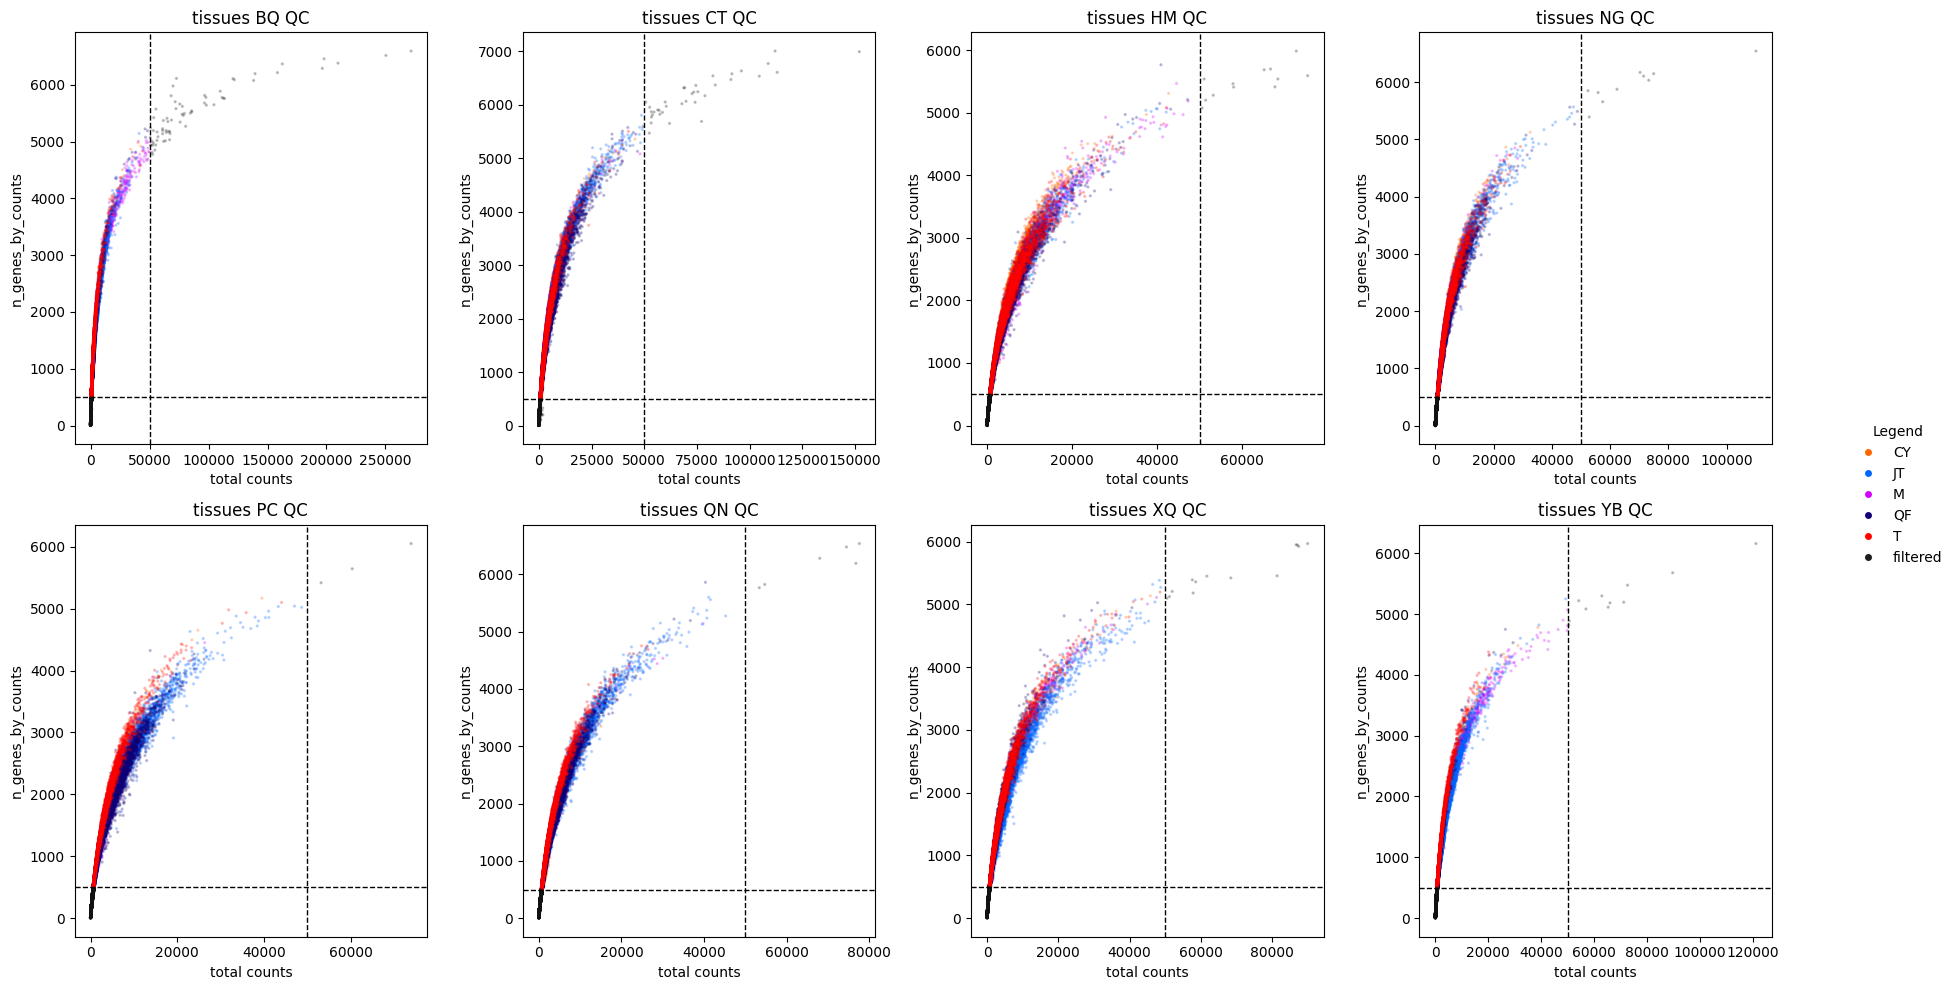

In [47]:
import matplotlib.pyplot as plt
import numpy as np

s = np.array(["#121213F5"] * len(x))

color_map = {'CY': "#FF6600",
             'QF': "#0066FF",
             'JT': "#D400FF",
             'M': "#120077",
             'T': "#FF0000",}

# 为每个 species 设置颜色
for ele in color_map:
    mask = (df['species'] == ele).values & con
    s[mask] = color_map[ele]

# 获取所有组织（最多8个）
tissues_list = df['tissues'].unique()
n_tissues = len(tissues_list)

# 创建 2x4 子图
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()  # 展平为一维，方便索引

# 存储图例句柄和标签（用于最后统一图例）
legend_handles = []
legend_labels = set()  # 用 set 避免重复

# 遍历每个组织，绘制到子图
for i, key in enumerate(tissues_list):
    ax = axes[i]
    idx = df['tissues'] == key

    # 绘制散点图
    ax.scatter(y[idx], x[idx], color=s[idx], s=2, alpha=0.2)

    # 设置坐标轴
    ax.set_xlabel('total counts')
    ax.set_ylabel('n_genes_by_counts')
    ax.set_title(f'tissues {key} QC')
    ax.axhline(y=500, color='black', linestyle='--', linewidth=1)
    ax.axvline(x=5e4, color='black', linestyle='--', linewidth=1)

    # 为当前子图构建图例内容（用于最后统一图例）
    for ele, color in color_map.items():
        if ((df['species'] == ele) & idx & con).any():
            if ele not in legend_labels:
                legend_handles.append(plt.Line2D([], [], marker='o', color='w', markerfacecolor=color, markersize=6, linestyle='None'))
                legend_labels.add(ele)

    if (idx & ~con).any():
        if 'filtered' not in legend_labels:
            legend_handles.append(plt.Line2D([], [], marker='o', color='w', markerfacecolor= "#121213F5", markersize=6, linestyle='None'))
            legend_labels.add('filtered')

# 隐藏多余的子图（如果 tissues < 8）
for j in range(i+1, 8):
    axes[j].set_visible(False)

# 统一图例（放在整个图的右侧中央）
fig.legend(legend_handles, sorted(legend_labels), 
           title='Legend', loc='center right', frameon=False, bbox_to_anchor=(0.98, 0.5))

plt.tight_layout(rect=[0, 0, 0.9, 1])  # 为右侧图例留空间

# 🖨️ 保存为 PDF（关键新增行）
plt.savefig('tissues_qc_plots.pdf', bbox_inches='tight', dpi=300, format='pdf')

# 显示图像（可选）
plt.show()

### plot the cell number change

In [35]:
atac_obs = pd.read_csv('atac_obs.csv', index_col=0)
index = atac_obs.index.values 
species = []
columns = []
for ele in index:
    key = ele.split('_')[-1]
    species.append(key[:-2])
    columns.append(key[-2:])

atac_obs['species'] = species
atac_obs['tissues'] = columns
df_3 = pd.crosstab(atac_obs['species'], atac_obs['tissues'])
df_3

tissues,BQ,CT,HM,NG,PC,QN,XQ,YB
species,,,,,,,,
CY,5145,10426,6866,7222,6709,7858,9191,5639
JT,4669,7278,6722,7481,4157,7412,9132,7128
M,6083,9054,4161,5950,7506,5946,9559,3023
QF,9394,9945,7095,8547,7768,9041,8630,10174
T,8346,7958,7616,6602,5709,6388,11231,7127


In [37]:
df_1 = pd.read_csv('counts_1.csv', index_col=0)
df_2 = pd.read_csv('counts_2.csv', index_col=0) 
df_1 

,BQ,CT,HM,NG,PC,QN,XQ,YB
species,,,,,,,,
CY,9423,14444,9251,12022,12198,12874,12445,10194
JT,7130,10190,9527,13566,13019,12830,11737,9773
M,10808,11772,8572,9422,10767,10074,12119,10029
QF,11798,13311,12068,13371,13035,11211,10576,13397
T,13003,11025,10413,9281,9712,11283,14171,12689


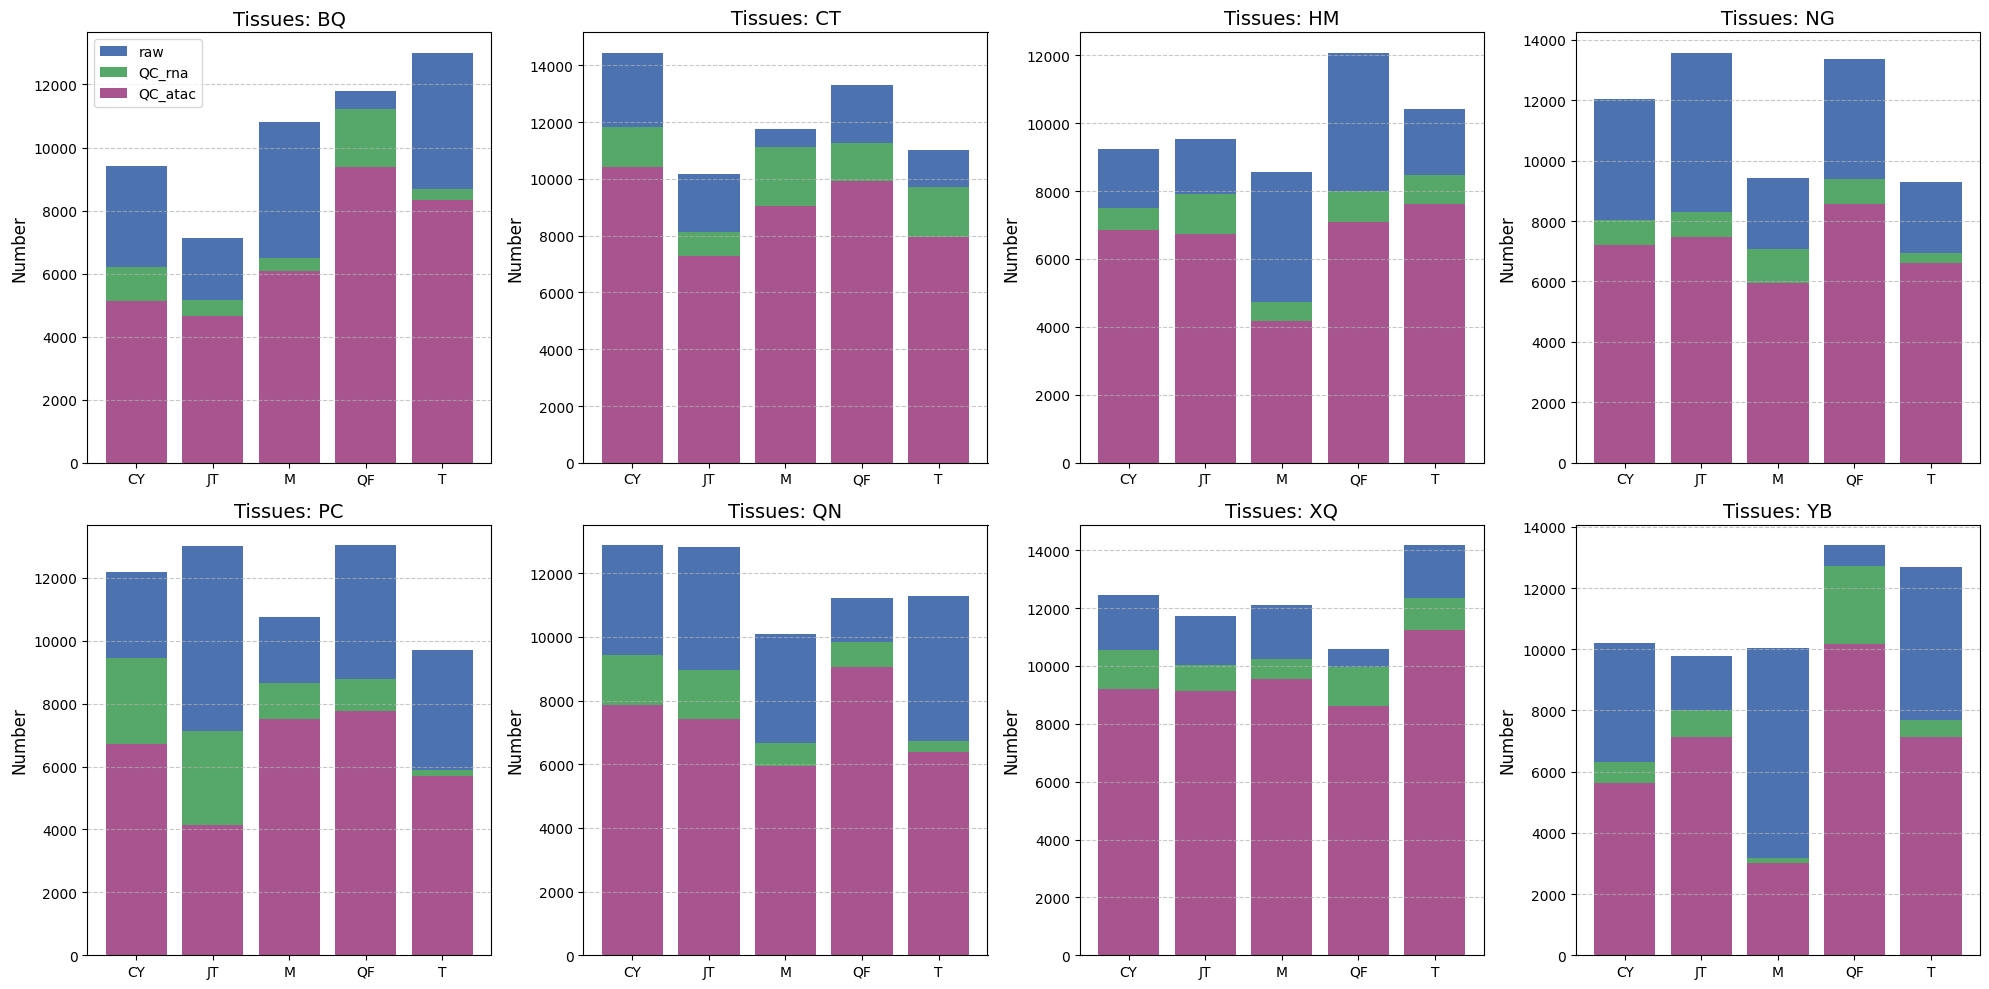

In [40]:
# 获取所有列名
columns = df_1.columns

# 设置子图布局
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axes = axes.flatten()  # 展平 axes 数组
species_names = df_1.index
x_pos = np.arange(len(species_names))

# 遍历每一列，在对应的子图中绘制堆叠柱状图
for i, col in enumerate(columns):
    ax = axes[i]
    
    # 绘制 df_1 的柱子（作为背景）
    ax.bar(x_pos, df_1[col], label='raw', color='#4c72b0')
    
    # 绘制 df_2 的柱子（作为前景，叠放在 df_1 上）
    ax.bar(x_pos, df_2[col], label='QC_rna', color='#55a868')
    ax.bar(x_pos, df_3[col], label='QC_atac', color="#a8558f")
    
    # 设置子图标题、x轴刻度和标签
    ax.set_title(f'Tissues: {col}', fontsize=14)
    ax.set_ylabel('Number', fontsize=12)
    ax.set_xticks(x_pos)
    ax.set_xticklabels(species_names, rotation=0)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    # 添加图例
    if i == 0:
        ax.legend()

# 调整布局，防止重叠
plt.tight_layout()
plt.savefig('qc_plot_2.pdf', bbox_inches='tight')
plt.show()

